In [ ]:
!pip install librosa 
# librosa 라는 패키지가 필요하므로 설치하는 코드입니다.

In [2]:
# 임포트
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
from scipy.fftpack import fft, ifft
import IPython
import os
import numpy as np
import librosa, librosa.display

%matplotlib inline

In [3]:
# 데이터 로드

base_path = './data/example/'

files = ['zero.wav', 'one.wav', 'two.wav', 'three.wav', 'four.wav', 'five.wav', 'six.wav', 'seven.wav', 'eight.wav', 'nine.wav']

# { "zero.wav": {"sample_rate": 8000, "samples": [...]},
#   "one.wav": {"sample_rate": 8000, "samples": [...]},
#   ...
#   "nine.wav": {"sample_rate": 8000, "samples": [...]}}

# 샘플 데이터 저장하는 법을 변경했습니다
sample_list = []
for f in files:
    wf = wavfile.read(base_path + f)
    assert wf[0] == 8000, "sampling rate must be 8000" # 샘플링 레이트는 무조건 8000이여야 합니다.
    sample_list.append(wavfile.read(base_path + f)[1])

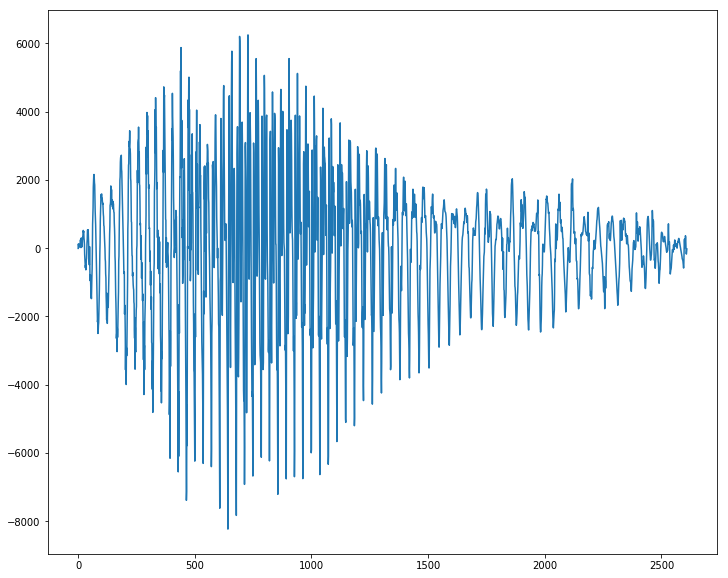

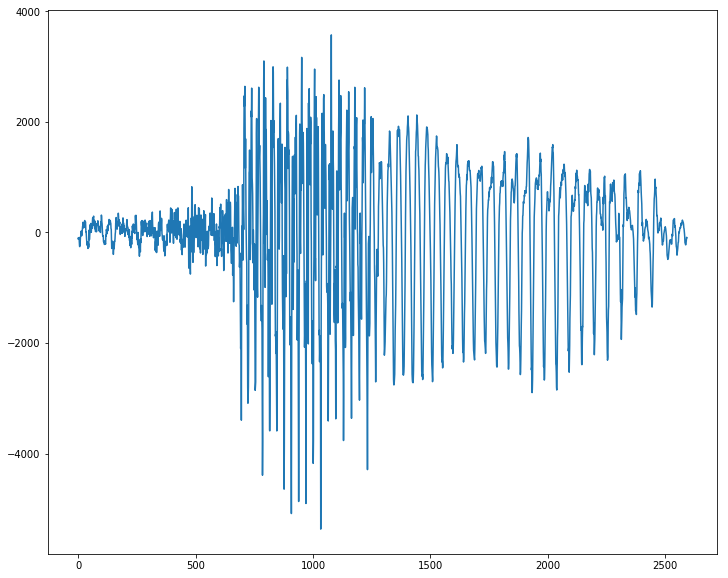

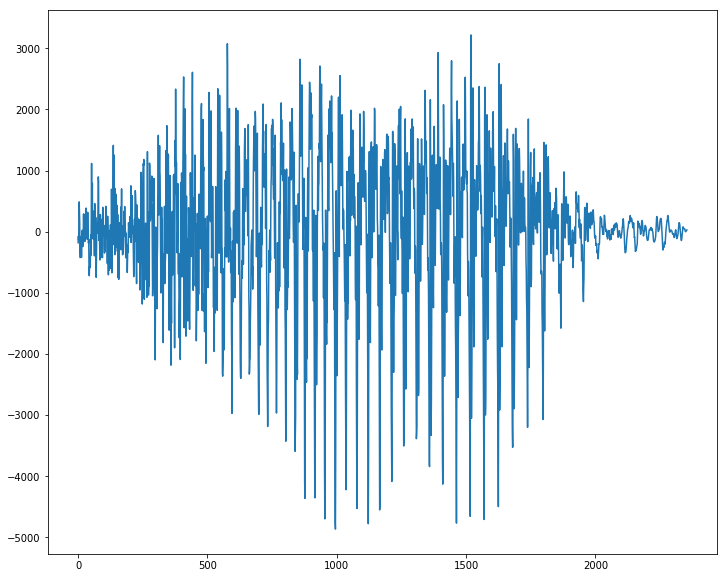

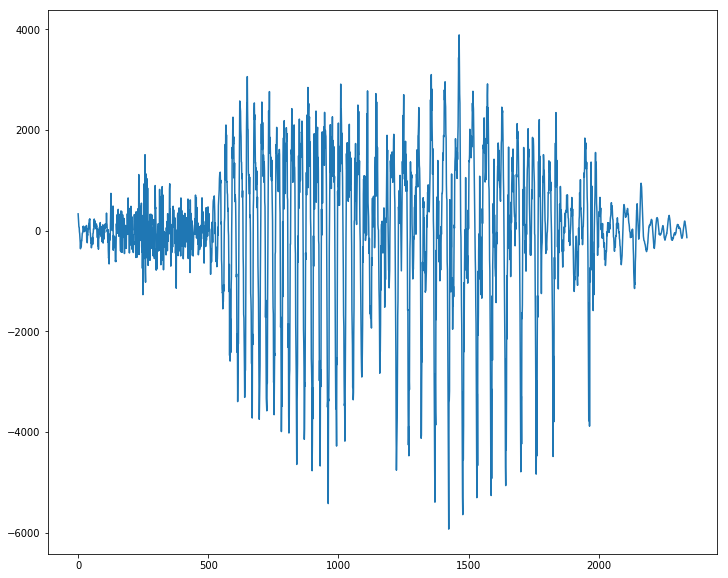

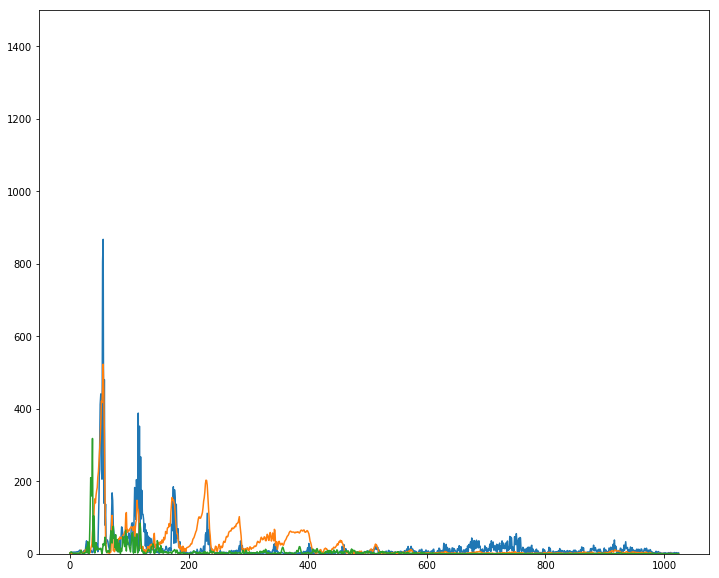

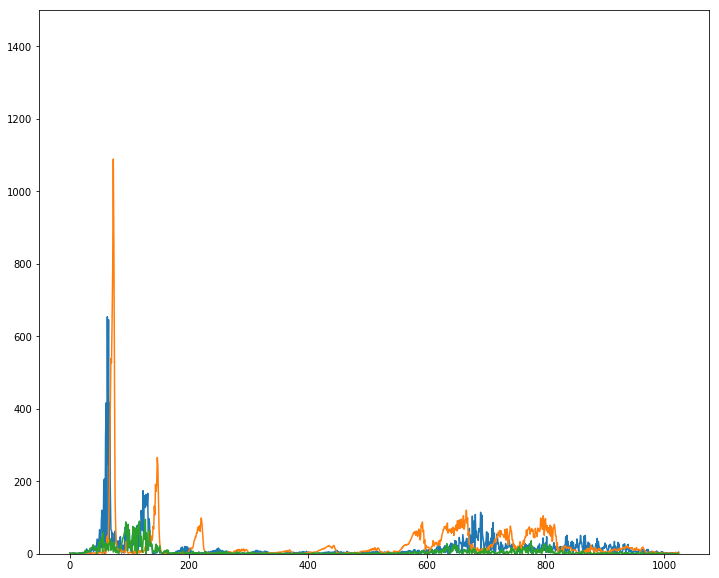

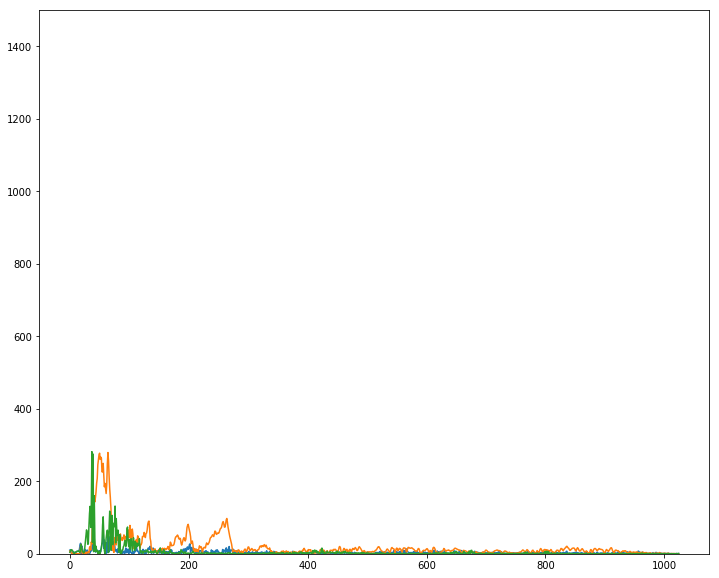

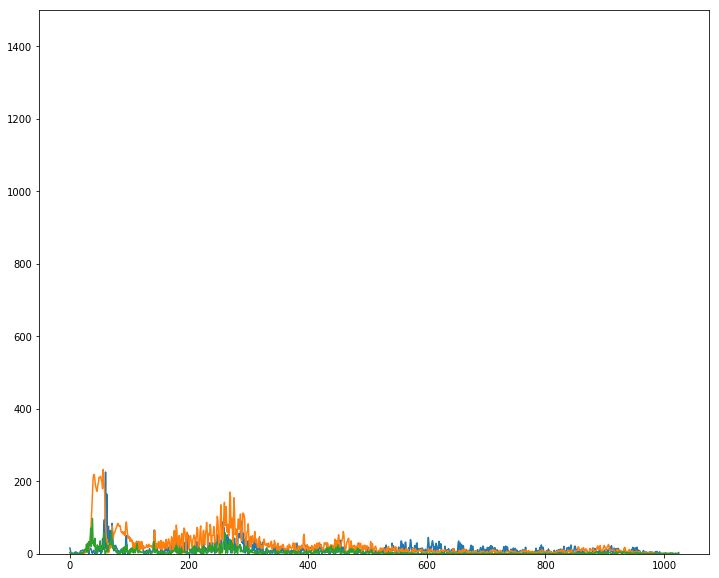

In [4]:
# 0 ㅇ ㅕ ㅇ
# 1 ㅇ ㅣ ㄹ
# 2 ㅇ ㅣ
# 3 ㅅ ㅏ ㅁ
# 4 ㅅ ㅏ
# 5 ㅇ ㅗ
# 6 ㅇ ㅠ ㄱ
# 7 ㅊ ㅣ ㄹ
# 8 ㅍ ㅏ ㄹ
# 9 ㄱ ㅜ

# 중성 1 2 7 ㅣ   3 4 8 ㅏ  0 ㅕ   5 ㅗ   6 ㅠ   9 ㅜ
# 초성 0 1 2 5 6 ㅇ    3 4 ㅅ    7 ㅊ    8 ㅍ    9 ㄱ
# 종성 2 4 5 9 x   1 7 8 ㄹ   0 ㅇ  3 ㅁ    6 ㄱ

plt.figure(figsize=(12, 10))
plt.plot(sample_list[0])

plt.figure(figsize=(12, 10))
plt.plot(sample_list[3])

plt.figure(figsize=(12, 10))
plt.plot(sample_list[4])

plt.figure(figsize=(12, 10))
plt.plot(sample_list[7])

D = np.abs(librosa.stft(np.asarray(sample_list[0], dtype='float32'), hop_length = len(sample_list[0])// 2)) / 1000
D.shape
plt.figure(figsize=(12,10))
plt.ylim([0, 1500])
plt.plot(D, label='first')

D = np.abs(librosa.stft(np.asarray(sample_list[1], dtype='float32'), hop_length = len(sample_list[1])// 2)) / 1000
D.shape
plt.figure(figsize=(12,10))
plt.ylim([0, 1500])
plt.plot(D, label='first')

D = np.abs(librosa.stft(np.asarray(sample_list[3], dtype='float32'), hop_length = len(sample_list[3])// 2)) / 1000
D.shape
plt.figure(figsize=(12,10))
plt.ylim([0, 1500])
plt.plot(D, label='first')

D = np.abs(librosa.stft(np.asarray(sample_list[4], dtype='float32'), hop_length = len(sample_list[4])// 2)) / 1000
D.shape
plt.figure(figsize=(12,10))
plt.ylim([0, 1500])
plt.plot(D, label='first')

In [5]:
IPython.display.Audio(data=sample_list[4], rate=8000)

In [6]:
?librosa.stft

In [7]:
help(librosa.stft)

Help on function stft in module librosa.core.spectrum:

stft(y, n_fft=2048, hop_length=None, win_length=None, window='hann', center=True, dtype=<class 'numpy.complex64'>, pad_mode='reflect')
    Short-time Fourier transform (STFT)
    
    Returns a complex-valued matrix D such that
        `np.abs(D[f, t])` is the magnitude of frequency bin `f`
        at frame `t`
    
        `np.angle(D[f, t])` is the phase of frequency bin `f`
        at frame `t`
    
    Parameters
    ----------
    y : np.ndarray [shape=(n,)], real-valued
        the input signal (audio time series)
    
    n_fft : int > 0 [scalar]
        FFT window size
    
    hop_length : int > 0 [scalar]
        number audio of frames between STFT columns.
        If unspecified, defaults `win_length / 4`.
    
    win_length  : int <= n_fft [scalar]
        Each frame of audio is windowed by `window()`.
        The window will be of length `win_length` and then padded
        with zeros to match `n_fft`.
    
        I

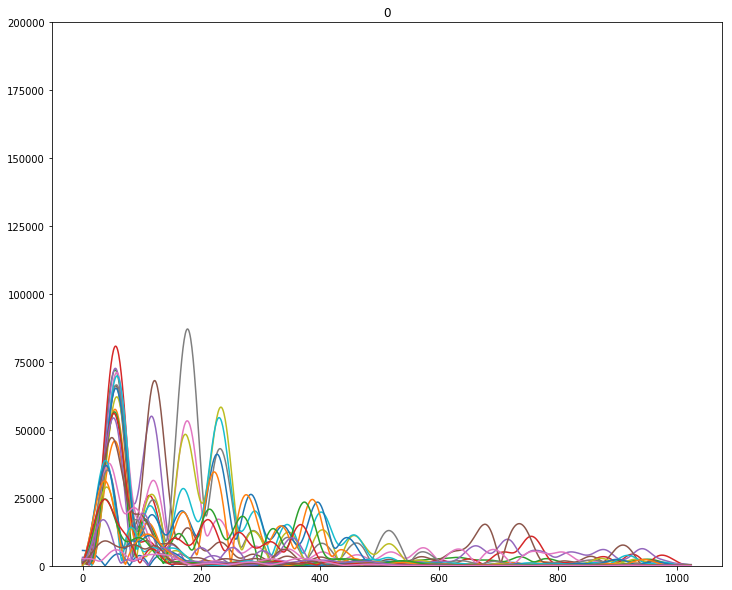

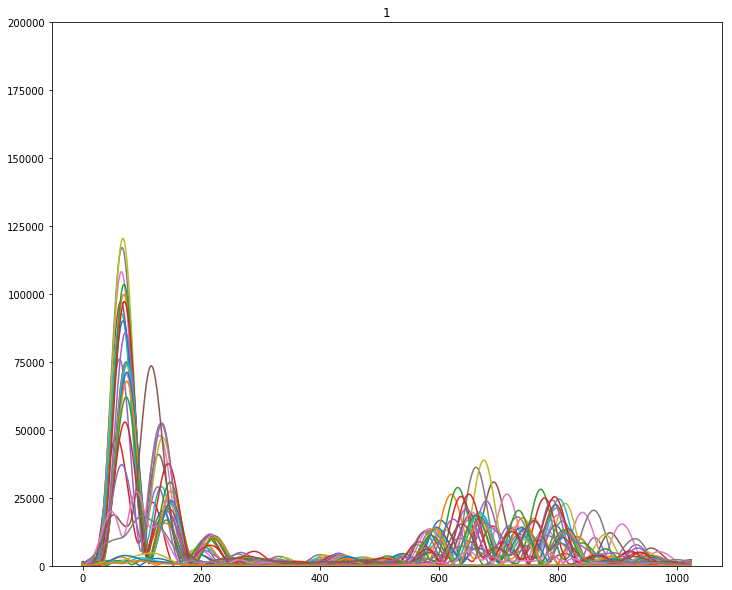

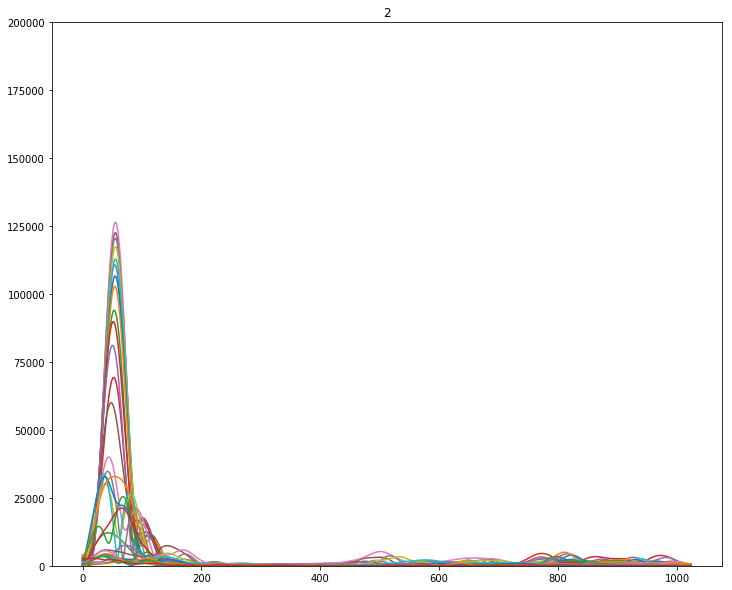

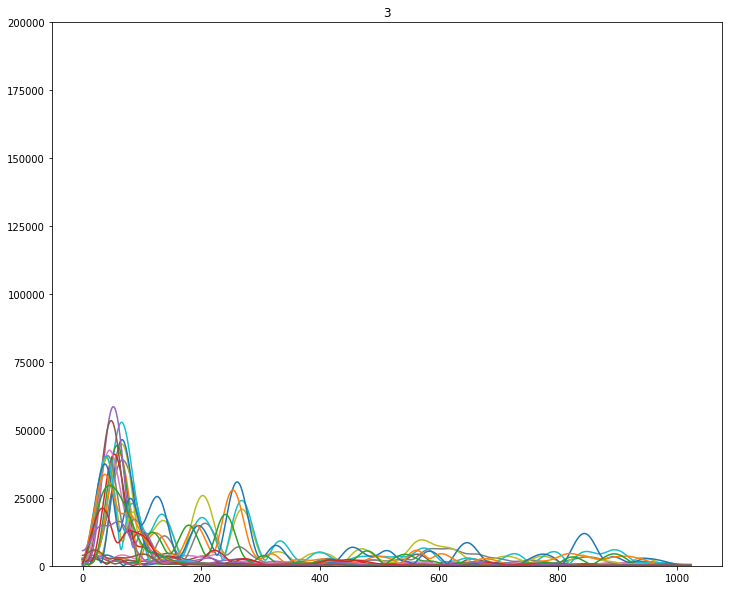

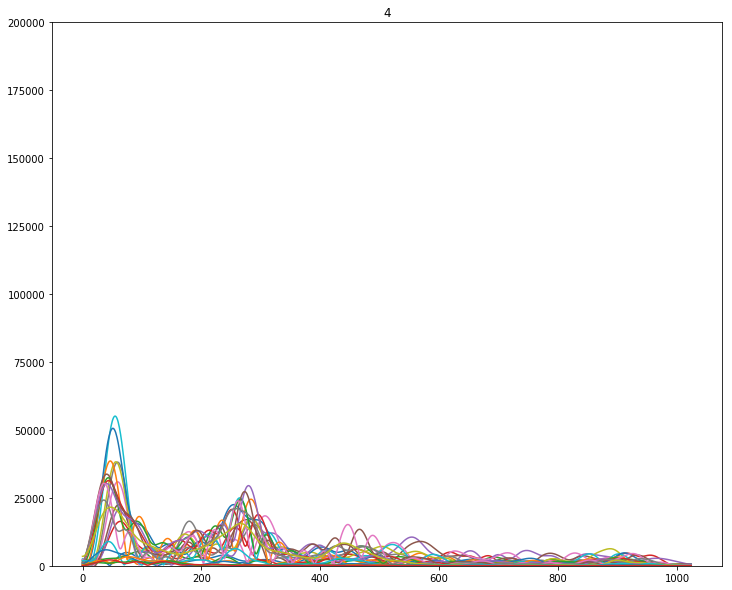

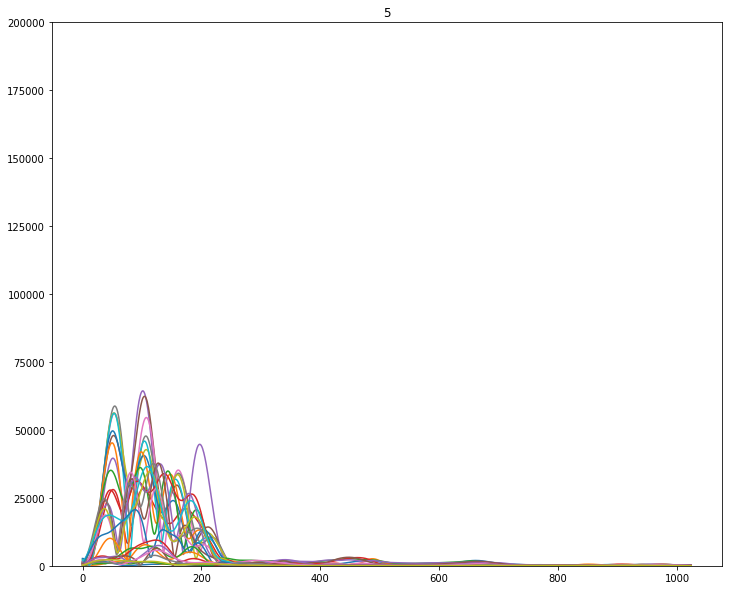

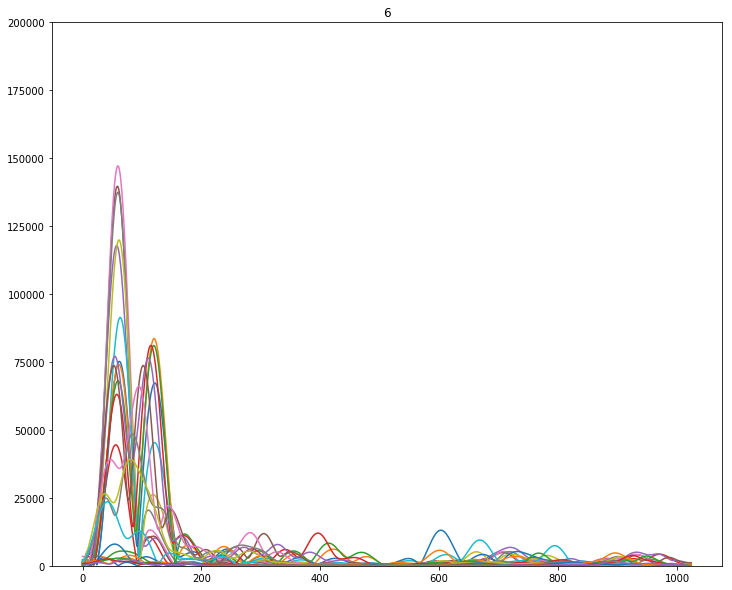

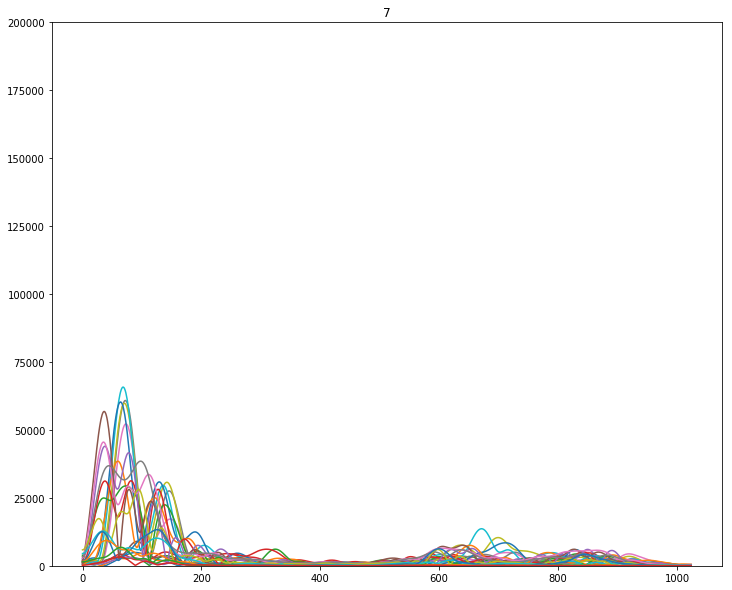

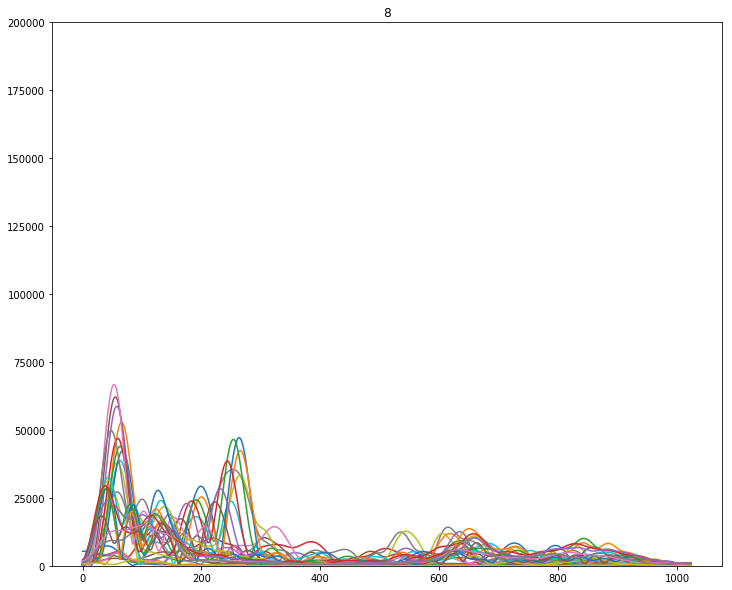

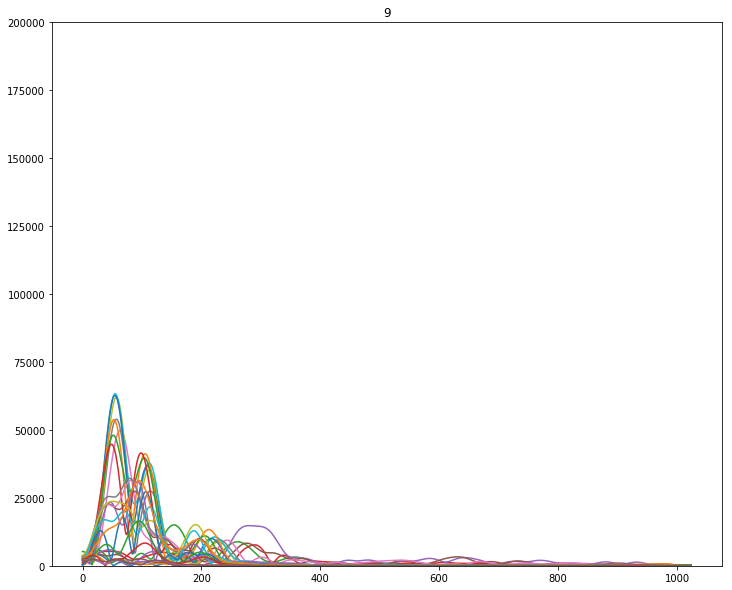

In [8]:
for i in range(10):
    D = np.abs(librosa.stft(np.asarray(sample_list[i], dtype='float32'), hop_length=100, win_length=100))
    #D = np.abs(fft(sample_list[7][:500]))
    #D.shape
    plt.figure(figsize=(12,10))
    plt.ylim([0, 200000])
    plt.plot(D, label='first')
    #print(len(sample_list[1]))
    #print(D.shape)
    plt.title(i)

In [9]:
def draw_stft_plot(number, time):
    D = np.abs(librosa.stft(np.asarray(sample_list[number], dtype='float32'), hop_length=100, win_length=100))
        #D = np.abs(fft(sample_list[7][:500]))
        #D.shape
    plt.figure(figsize=(12,10))
    plt.ylim([0, 200000])
    plt.plot(D[:, time], label='first')
    #print(len(sample_list[1]))
    #print(D.shape)
    plt.title(number)

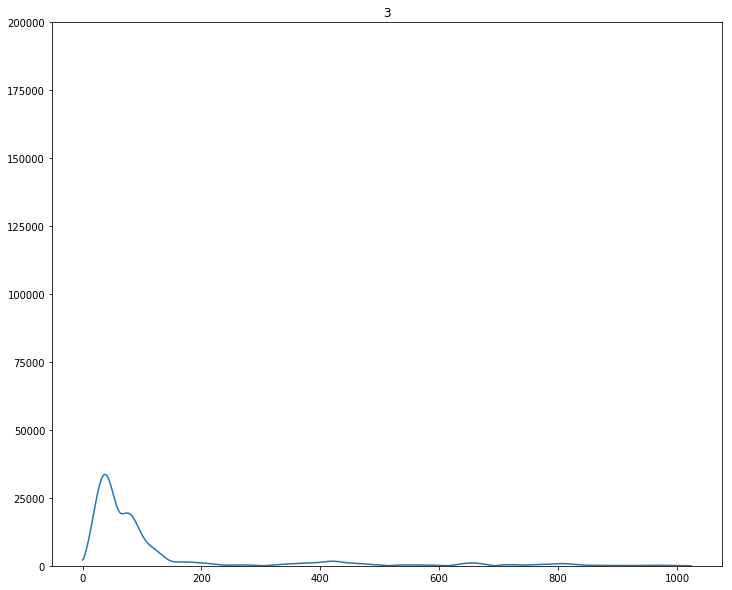

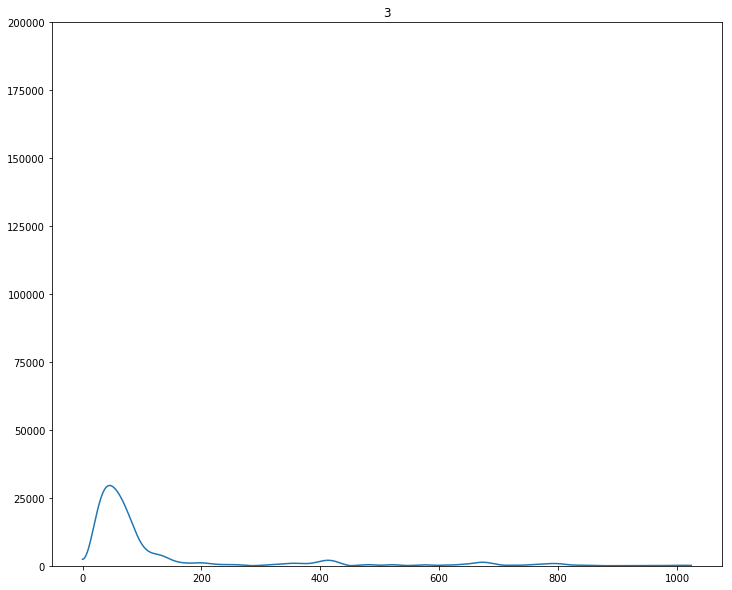

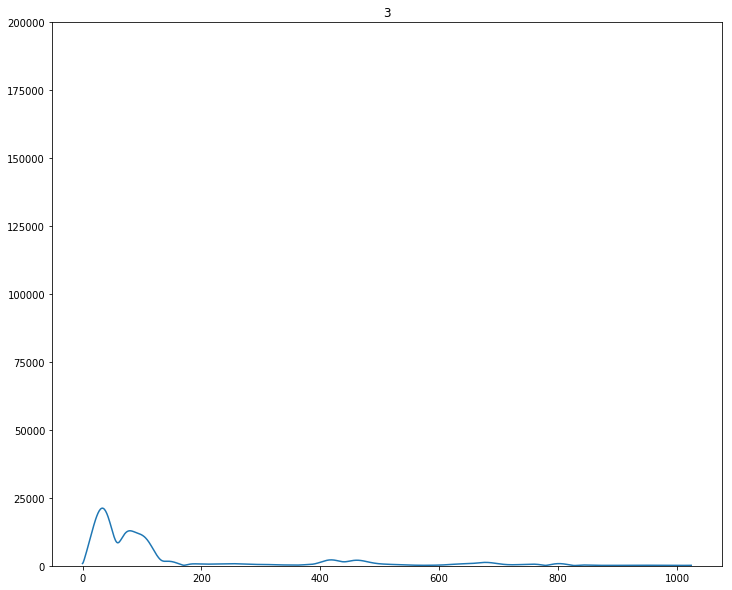

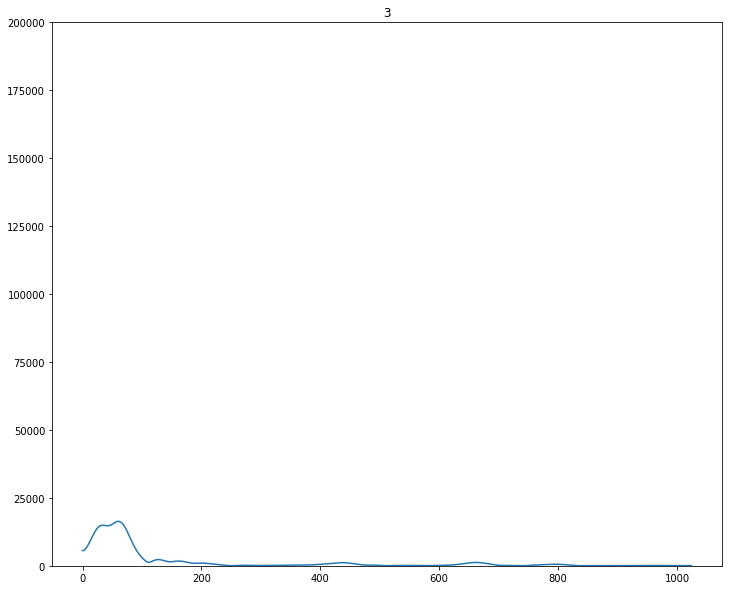

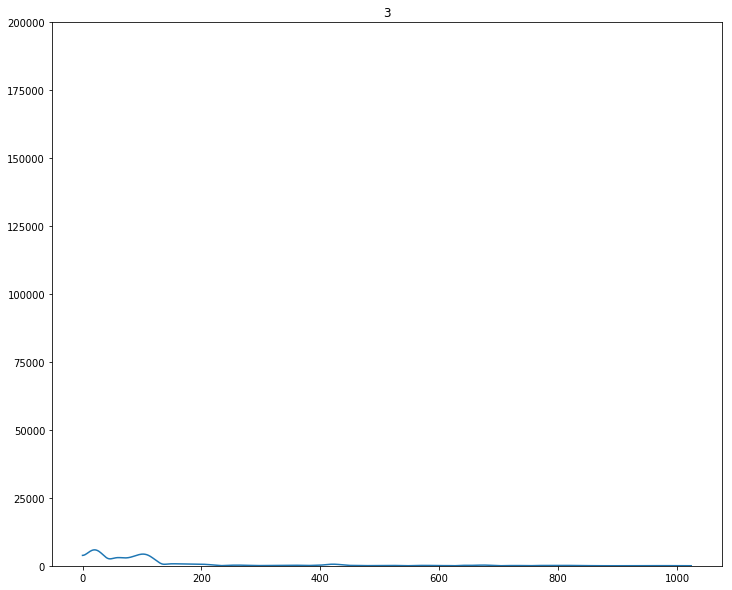

In [10]:
times = 4
draw_stft_plot(3, 1 + 5 *times)
draw_stft_plot(3, 2 + 5 *times)
draw_stft_plot(3, 3 + 5 *times)
draw_stft_plot(3, 4 + 5 *times)
draw_stft_plot(3, 5 + 5 *times)


In [11]:
# 0 1 2 5 6
# 3 4 7 8 9

def divide_ratio(divide_number, time, number):
    D = np.abs(librosa.stft(np.asarray(sample_list[number], dtype='float32'), 
                            hop_length=len(sample_list[number]) // divide_number, 
                            win_length=len(sample_list[number]) // divide_number))
    
    total = D[:, time].sum()
    ratio = []
    for i in range(divide_number):
        start = i * D.shape[0] // divide_number
        end = (i + 1) * D.shape[0] // divide_number
        
        ratio.append(D[start:end, time].sum() / total)
        
    return ratio
    

In [12]:
def draw_stft_plot_divide(number, time, divide_number):
    D = np.abs(librosa.stft(np.asarray(sample_list[number], dtype='float32'), 
                            hop_length=len(sample_list[number]) // divide_number, 
                            win_length=len(sample_list[number]) // divide_number))
        #D = np.abs(fft(sample_list[7][:500]))
        #D.shape
    plt.figure(figsize=(12,10))
    plt.ylim([0, 200000])
    plt.plot(D[:, time], label='first')
    #print(len(sample_list[1]))
    #print(D.shape)
    plt.title(number)

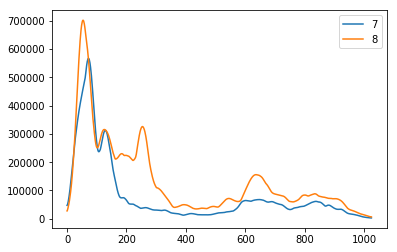

In [20]:
def stft_sum(number):
    D = np.abs(librosa.stft(np.asarray(sample_list[number], dtype='float32'), 
                            hop_length=100, 
                            win_length=100))
    a = D.sum(axis=1)
    return a

#plt.plot(stft_sum(0), label='0')
#plt.plot(stft_sum(1), label='1')
#plt.plot(stft_sum(2), label='2')
#plt.plot(stft_sum(3), label='3')
#plt.plot(stft_sum(4), label='4')
#plt.plot(stft_sum(5), label='5')    # 두번째 피처가 더 큰 수는 5만 있다!
#plt.plot(stft_sum(6), label='6')
plt.plot(stft_sum(7), label='7')
plt.plot(stft_sum(8), label='8')

#plt.plot(stft_sum(9), label='9')

plt.legend()


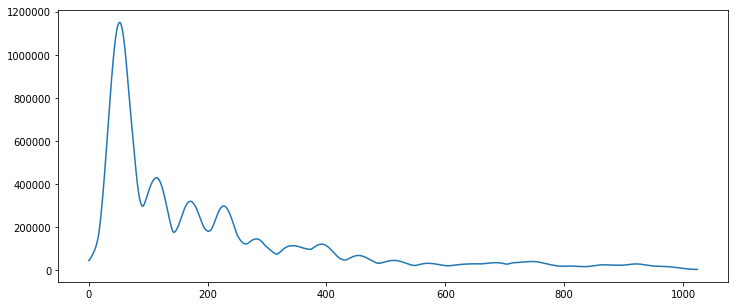

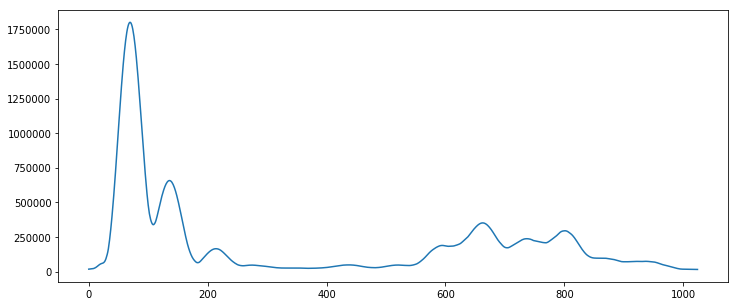

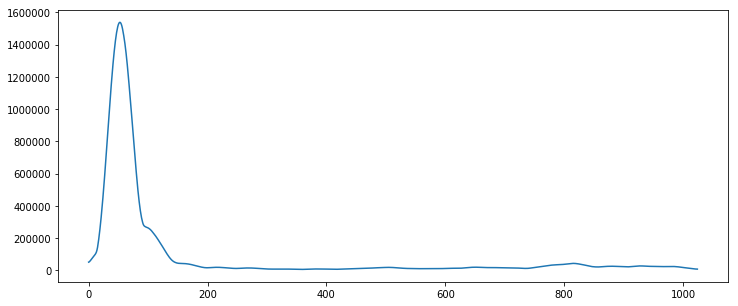

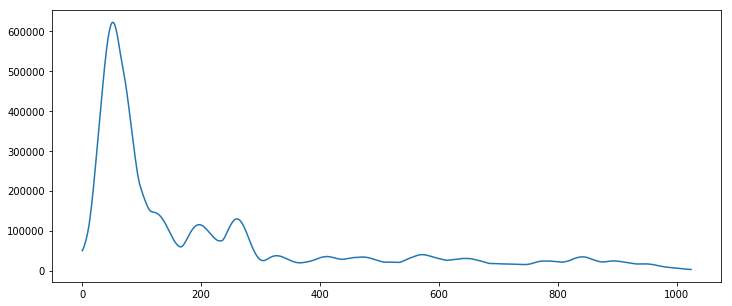

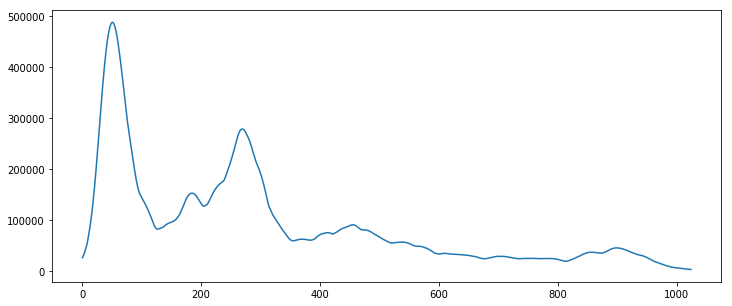

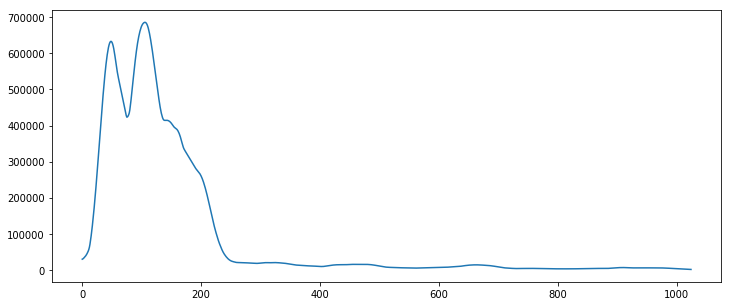

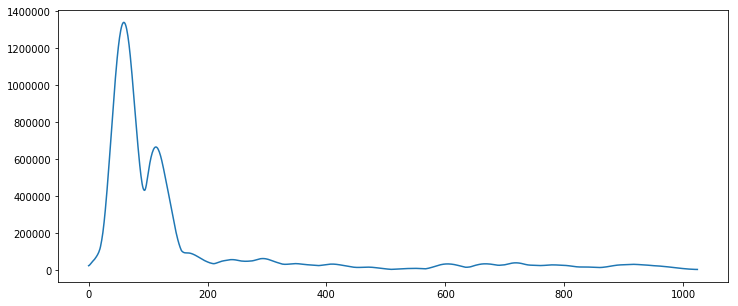

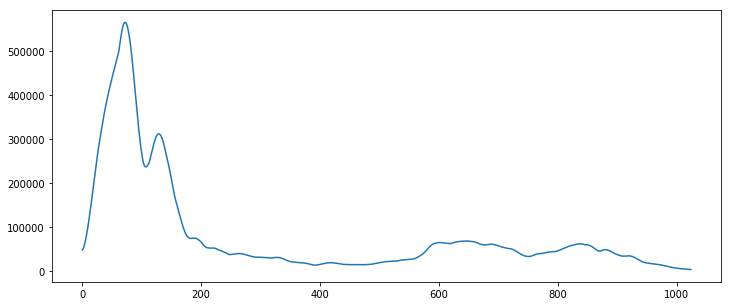

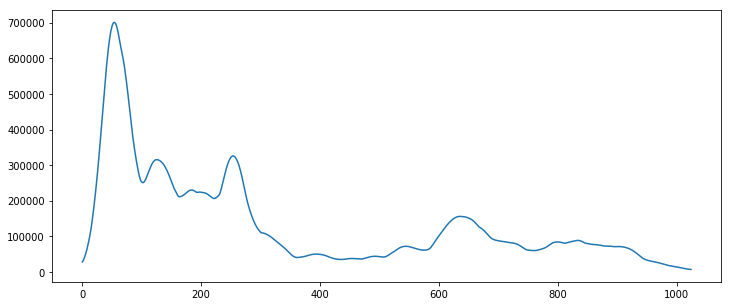

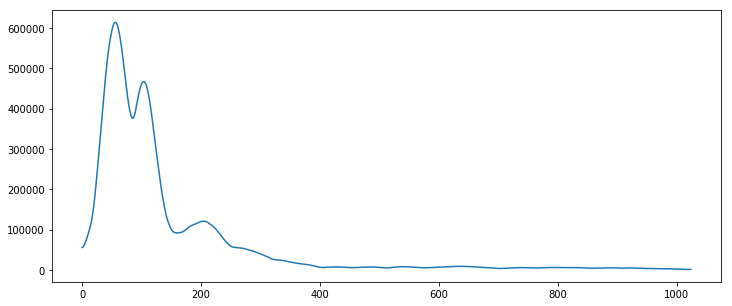

In [14]:
for i in range(10):
    plt.figure(figsize=(12, 5))
    plt.plot(stft_sum(i), label=i)

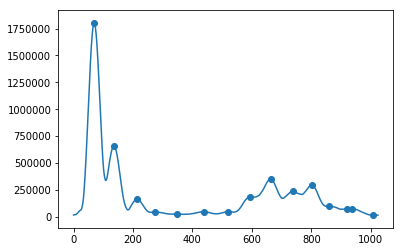

In [15]:
def detect_pitch(x):
    """
    params:
        x : Array
    return:
        a list of pitches
    """
    
    pitches = np.empty((1, 2))
    for i in range(1, len(x) - 1):
        if x[i - 1] < x[i] and x[i] > x[i + 1]:
            pitches = np.concatenate((pitches, [[i, x[i]]]), axis=0)
            
    return pitches[1:,]

a = detect_pitch(stft_sum(1))

plt.plot(stft_sum(1), label='1')
plt.scatter(a[:, 0], a[:, 1])

In [16]:
def smooth(x):
    x_ = []
    
    x_.append(x[0])
    
    for i in range(1, len(x)):
        half = (x[i -1] + [i]) / 2
        x_.append(half)
        
    return x_



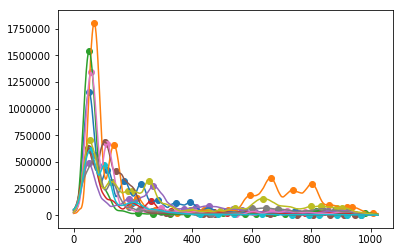

In [17]:
for i in range(10):
    a = detect_pitch(stft_sum(i))

    plt.plot(stft_sum(i), label='i')
    plt.scatter(a[:, 0], a[:, 1])

In [170]:
help(plt.specgram)

Help on function specgram in module matplotlib.pyplot:

specgram(x, NFFT=None, Fs=None, Fc=None, detrend=None, window=None, noverlap=None, cmap=None, xextent=None, pad_to=None, sides=None, scale_by_freq=None, mode=None, scale=None, vmin=None, vmax=None, hold=None, data=None, **kwargs)
    Plot a spectrogram.
    
    Call signature::
    
      specgram(x, NFFT=256, Fs=2, Fc=0, detrend=mlab.detrend_none,
               window=mlab.window_hanning, noverlap=128,
               cmap=None, xextent=None, pad_to=None, sides='default',
               scale_by_freq=None, mode='default', scale='default',
               **kwargs)
    
    Compute and plot a spectrogram of data in *x*.  Data are split into
    *NFFT* length segments and the spectrum of each section is
    computed.  The windowing function *window* is applied to each
    segment, and the amount of overlap of each segment is
    specified with *noverlap*. The spectrogram is plotted as a colormap
    (using imshow).
    
    Paramet

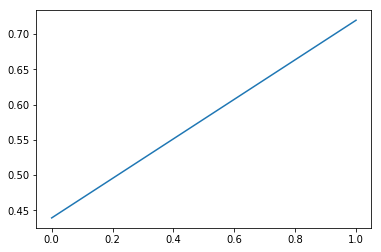

In [240]:
divide_ratio(2, 1, 1)
#draw_stft_plot_divide(1, 1, 2)
plt.plot(smooth(divide_ratio(2, 1, 1)))

In [238]:
help(plt.specgram)

Help on function specgram in module matplotlib.pyplot:

specgram(x, NFFT=None, Fs=None, Fc=None, detrend=None, window=None, noverlap=None, cmap=None, xextent=None, pad_to=None, sides=None, scale_by_freq=None, mode=None, scale=None, vmin=None, vmax=None, hold=None, data=None, **kwargs)
    Plot a spectrogram.
    
    Call signature::
    
      specgram(x, NFFT=256, Fs=2, Fc=0, detrend=mlab.detrend_none,
               window=mlab.window_hanning, noverlap=128,
               cmap=None, xextent=None, pad_to=None, sides='default',
               scale_by_freq=None, mode='default', scale='default',
               **kwargs)
    
    Compute and plot a spectrogram of data in *x*.  Data are split into
    *NFFT* length segments and the spectrum of each section is
    computed.  The windowing function *window* is applied to each
    segment, and the amount of overlap of each segment is
    specified with *noverlap*. The spectrogram is plotted as a colormap
    (using imshow).
    
    Paramet